In [1]:
# Step 1: Install and import necessary packages
#tensorflow.keras is used to build and train the CNN model.
#matplotlib and seaborn help visualize performance.
#sklearn.metrics is used to evaluate model performance (precision, recall, F1-score, etc.).

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf


In [2]:
# Step 2: Mount Google Drive to access the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Step 3: Define the path to your dataset

data_dir = '/content/drive/MyDrive/Colab Notebooks/image dataset'

In [10]:
# Step 4: Image preprocessing and data augmentation
#Rescales pixel values from [0–255] to [0–1] for faster training.
#validation_split=0.2 splits the data into 80% training and 20% validation.

img_height, img_width = 150, 150
batch_size = 32

# Split data into training (80%) and validation (20%)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#Load the images from folders.
#Resize them to 150x150.
#Automatically label the images based on folder names.
#Split into training and validation subsets.

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1531 images belonging to 9 classes.
Found 378 images belonging to 9 classes.


In [11]:
# Step 5: Define the CNN model
#Conv2D layers extract features (edges, shapes).
#MaxPooling2D reduces spatial size (downsizing).
#Flatten converts 2D to 1D before fully connected layers.
#Dense(128) learns patterns; Dropout(0.5) prevents overfitting.
#Final Dense layer outputs probabilities for each class using softmax.

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer: one node per class
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Step 6: Compile the model
#Adam is an adaptive optimizer.
#categorical_crossentropy is used for multi-class classification.
#The model will measure its performance using accuracy.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Step 7: Train the model
#Trains the model for 10 epochs.
#During each epoch, it:
#Learns from the training set.
#Validates performance on the validation set.

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.6514 - loss: 1.7858 - val_accuracy: 0.7910 - val_loss: 0.9616
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 809ms/step - accuracy: 0.8011 - loss: 0.9524 - val_accuracy: 0.7910 - val_loss: 0.8521
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 805ms/step - accuracy: 0.7919 - loss: 0.8706 - val_accuracy: 0.7910 - val_loss: 0.8029
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 797ms/step - accuracy: 0.7909 - loss: 0.7068 - val_accuracy: 0.7937 - val_loss: 0.7279
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 841ms/step - accuracy: 0.8065 - loss: 0.6037 - val_accuracy: 0.7989 - val_loss: 0.7057
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - accuracy: 0.8248 - loss: 0.4840 - val_accuracy: 0.8069 - val_loss: 0.7252
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 857ms/step - accuracy: 0.8736 - loss: 0.3600 - val_accuracy: 0.8016 - val_loss: 0.7787
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 857ms/step - accuracy: 0.8957 - loss: 0.3011 - val_accura

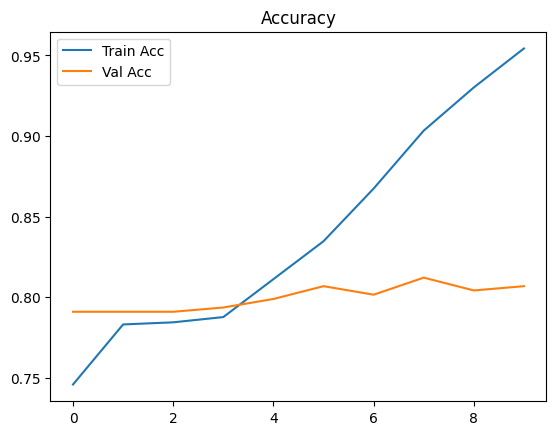

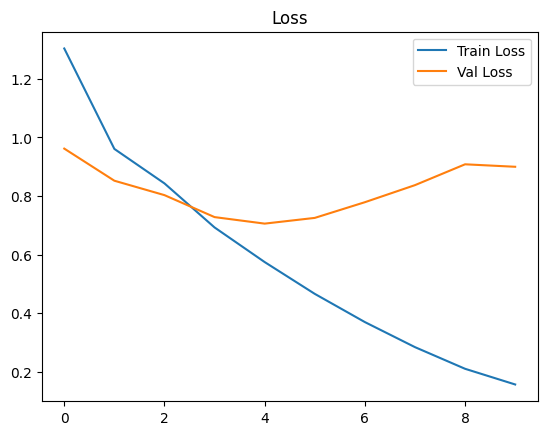

In [14]:
# Step 8: Plot training and validation accuracy and loss
#Plots line graphs for:
#Training vs Validation Accuracy
#Training vs Validation Loss
#Helps detect overfitting or underfitting.

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [15]:
# Step 9: Evaluate and print metrics
#Runs the model on validation data to get predictions.
#Converts probabilities to class labels.
#Compares them with true labels and prints:
#Precision, Recall, F1-score, and Support for each class.

val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step
Classification Report:
                  precision    recall  f1-score   support

          afghan       0.00      0.00      0.00         7
        airedale       0.00      0.00      0.00         8
american_bulldog       0.00      0.00      0.00        12
         basenji       0.00      0.00      0.00         5
          basset       0.00      0.00      0.00        12
          beagle       0.00      0.00      0.00        20
        bermaise       0.00      0.00      0.00         8
        dogfaces       0.79      0.92      0.85       299
        wild_dog       0.00      0.00      0.00         7

        accuracy                           0.72       378
       macro avg       0.09      0.10      0.09       378
    weighted avg       0.63      0.72      0.67       378



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


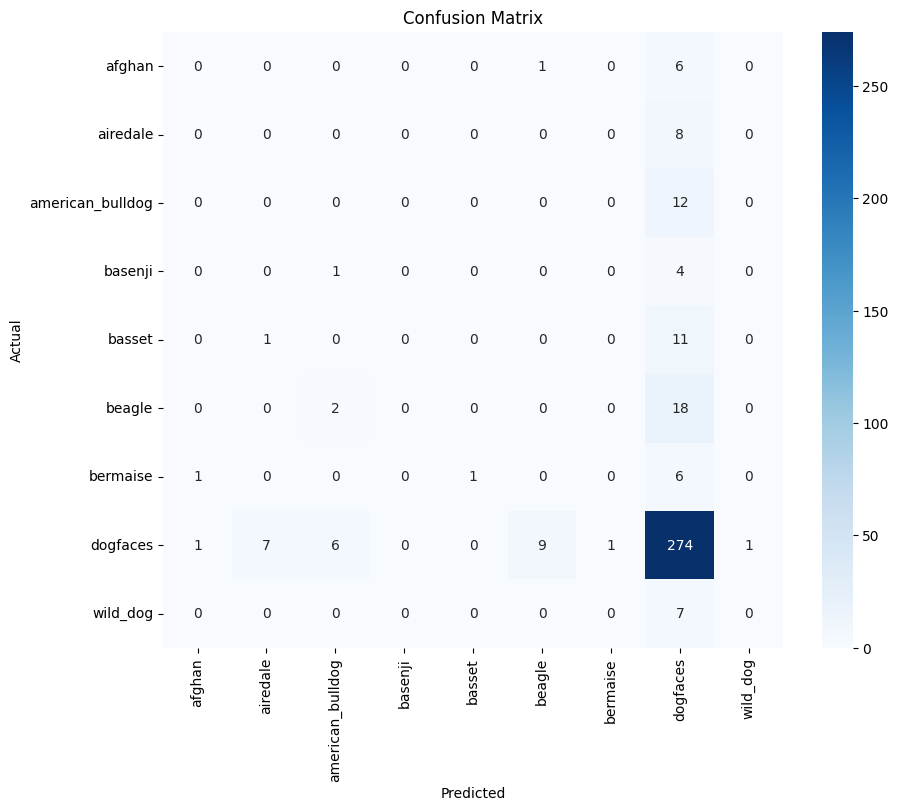

In [16]:
# Step 10: Plot confusion matrix
#Builds a confusion matrix that shows:
#Correct vs incorrect predictions per class.
#The heatmap makes it visually easy to understand where the model is getting confused.

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_data.class_indices.keys(),
            yticklabels=val_data.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix reveals that the CNN model is heavily biased toward the "dogfaces" class, predicting nearly every input image as that category, with 274 predictions made for it alone, while almost all other classes—including afghan, beagle, and airedale—were misclassified or not predicted correctly at all. This indicates a serious issue with model generalization, likely caused by dataset imbalance (i.e., significantly more images of "dogfaces"), insufficient training, or inadequate feature extraction. Despite training accuracy possibly appearing acceptable, the confusion matrix highlights that the model fails to differentiate between classes and instead defaults to the dominant label. To address this, it is crucial to balance the dataset, apply stronger data augmentation, consider using class weights, and possibly switch to a more robust approach like transfer learning with a pretrained model such as MobileNetV2, which can help the model learn more complex features and improve classification across all classes.